# Question - 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df = pd.concat([df_train.drop(['Survived'], axis=1), df_test])

In [4]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [6]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [7]:
def fnc(col):
    if pd.isnull(col):
        return 0
    else:
        return 1

In [8]:
df['Has_Cabin'] = df['Cabin'].apply(fnc)
df['Has_Cabin'].head()

0    0
1    1
2    0
3    1
4    0
Name: Has_Cabin, dtype: int64

In [9]:
import re
df['Title'] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

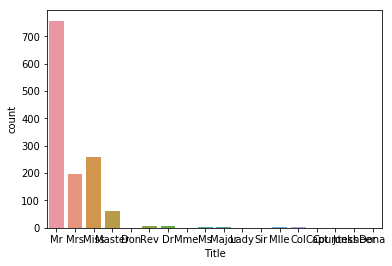

In [12]:
sns.countplot(x='Title', data=df)

In [13]:
list(sorted(df['Pclass'].unique()))
for i in range(1,4):
    print('Average passenger age of class '+str(i)+': '+str(df[df['Pclass']==i]['Age'].mean()))

Average passenger age of class 1: 39.15992957746479
Average passenger age of class 2: 29.506704980842912
Average passenger age of class 3: 24.81636726546906


In [14]:
def imputeAge(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 39
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

df['Age'] = df[['Age', 'Pclass']].apply(imputeAge, axis=1)

In [15]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Has_Cabin         0
Title             0
dtype: int64

In [16]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Categorical_age'] = pd.qcut(df['Age'], 4, labels=[1, 2, 3, 4])
df['Categorical_fare'] = pd.qcut(df['Fare'], 4, labels=[1, 2, 3, 4])
df[['Categorical_age', 'Categorical_fare']].head(10)

,Categorical_age,Categorical_fare
0,1,1
1,4,4
2,2,2
3,3,4
4,3,2
5,2,2
6,4,4
7,1,3
8,3,2
9,1,3


In [17]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True)
df = pd.concat([df, sex, embark], axis=1)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Title,Categorical_age,Categorical_fare,male,Q,S
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,1,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,4,4,0,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,2,2,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,3,4,0,0,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,3,2,1,0,1


In [18]:
df.isnull().sum()

PassengerId            0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin               1014
Embarked               2
Has_Cabin              0
Title                  0
Categorical_age        0
Categorical_fare       0
male                   0
Q                      0
S                      0
dtype: int64

In [19]:
df.drop(['Cabin', 'Name', 'PassengerId', 'Ticket', 'Age', 'Fare', 'SibSp', 'Parch', 'Title', 'Sex', 'Embarked'], axis=1, inplace=True)
df.head(10)

,Pclass,Has_Cabin,Categorical_age,Categorical_fare,male,Q,S
0,3,0,1,1,1,0,1
1,1,1,4,4,0,0,0
2,3,0,2,2,0,0,1
3,1,1,3,4,0,0,1
4,3,0,3,2,1,0,1
5,3,0,2,2,1,1,0
6,1,1,4,4,1,0,1
7,3,0,1,3,1,0,1
8,3,0,3,2,0,0,1
9,2,0,1,3,0,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
Pclass              1309 non-null int64
Has_Cabin           1309 non-null int64
Categorical_age     1309 non-null category
Categorical_fare    1309 non-null category
male                1309 non-null uint8
Q                   1309 non-null uint8
S                   1309 non-null uint8
dtypes: category(2), int64(2), uint8(3)
memory usage: 77.4 KB


In [21]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
Pclass              1309 non-null int64
Has_Cabin           1309 non-null int64
Categorical_age     1309 non-null category
Categorical_fare    1309 non-null category
male                1309 non-null uint8
Q                   1309 non-null uint8
S                   1309 non-null uint8
dtypes: category(2), int64(2), uint8(3)
memory usage: 37.4 KB


In [22]:
X_train = df[0:891]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass              891 non-null int64
Has_Cabin           891 non-null int64
Categorical_age     891 non-null category
Categorical_fare    891 non-null category
male                891 non-null uint8
Q                   891 non-null uint8
S                   891 non-null uint8
dtypes: category(2), int64(2), uint8(3)
memory usage: 25.6 KB


In [23]:
X_test = df[891:]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass              418 non-null int64
Has_Cabin           418 non-null int64
Categorical_age     418 non-null category
Categorical_fare    418 non-null category
male                418 non-null uint8
Q                   418 non-null uint8
S                   418 non-null uint8
dtypes: category(2), int64(2), uint8(3)
memory usage: 12.2 KB


In [24]:
y_train = df_train['Survived']

# Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Testing the Model

In [26]:
log.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,